Task - predict which factors predict future user adoption.
We are provided with 2 csv data tables - takehome_users.csv and takehome_user_engagement.csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users_data = pd.read_csv('/Users/jisasv1/Documents/relax_challenge/takehome_users.csv')

In [3]:
users_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users_data.shape

(12000, 10)

In [5]:
users_data.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [6]:
users_data.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN
11999,12000,2014-01-26 08:57:12,Lima Tha�s,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN


In [7]:
users_data.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [8]:
users_data['name'].nunique()

11349

In [9]:
users_data['object_id'].nunique()

12000

In [10]:
users_data['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [11]:
user_engagement= pd.read_csv('/Users/jisasv1/Documents/relax_challenge/takehome_user_engagement.csv')

In [12]:
user_engagement.shape

(207917, 3)

In [13]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [14]:
user_engagement.tail()

,time_stamp,user_id,visited
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


In [15]:
user_engagement.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [16]:
user_engagement['user_id'].nunique()

8823

In [17]:
user_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


According to our statistics, the average time a user visits the site is 1. 

So before doing any operations on our data, let's convert the timestamp column of user_engagement dataframe to python datetime object. And then let's index our dataframe by date.

let's merge users_data and user_engagement dataframes

In [18]:
#rename object_id column of users_data to user_id
users_data.rename(columns= {'object_id':'user_id'}, inplace=True)

In [19]:
users_data.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [20]:
users_logins = users_data.merge(user_engagement, how='inner', on='user_id')

In [21]:
users_logins.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1


<AxesSubplot:xlabel='visited', ylabel='org_id'>

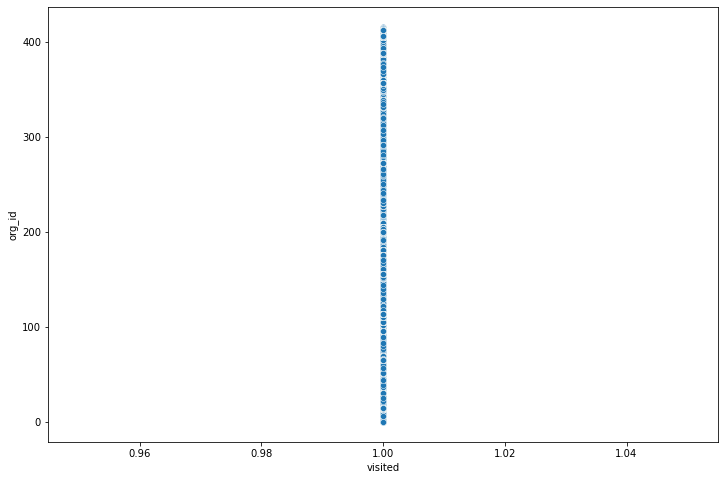

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='visited', y='org_id', data=users_logins)

<AxesSubplot:xlabel='visited', ylabel='invited_by_user_id'>

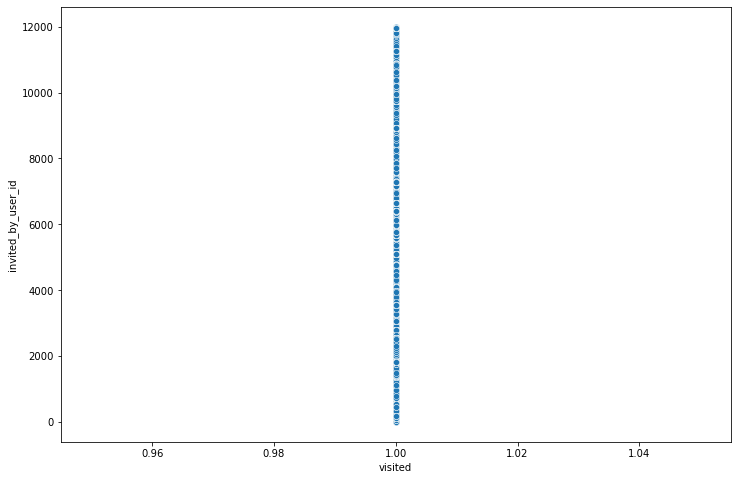

In [55]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='visited', y='invited_by_user_id', data=users_logins)

<AxesSubplot:>

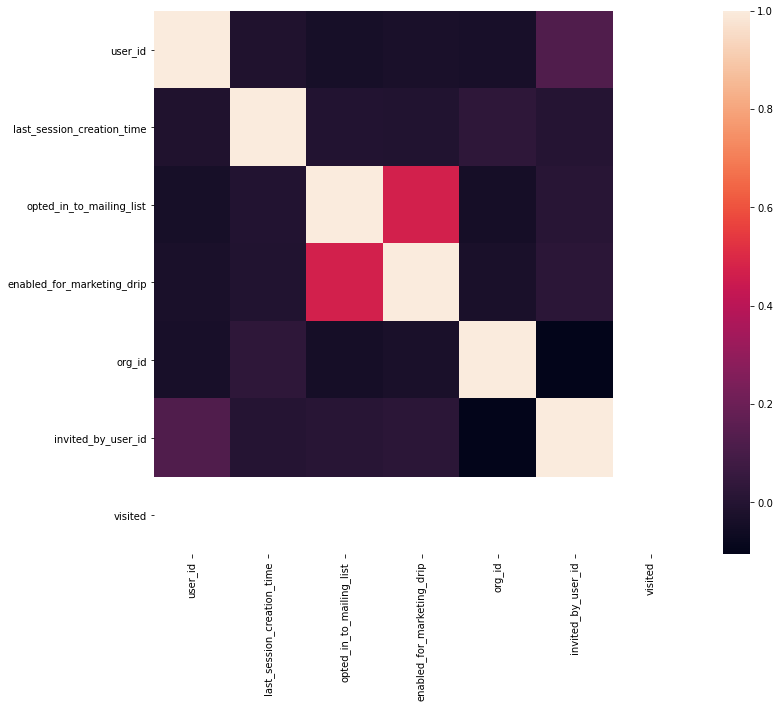

In [22]:
plt.subplots(figsize=(12,10))
sns.heatmap(users_logins.corr())

In [23]:
user_engagement['login_time']= pd.to_datetime(user_engagement['time_stamp'])

In [24]:
user_engagement['login_date'] = user_engagement['login_time'].dt.date

In [25]:
#user_engagement.set_index('login_date', inplace=True)
#user_engagement.head()

Let's find out which of the users in the user_engagement dataframe have logged 3 or more than 3 times in a week

In [26]:
boolean = pd.Series.to_dict(user_engagement.groupby('user_id').count().login_date >= 3)
boolean

{1: False,
 2: True,
 3: False,
 4: False,
 5: False,
 6: False,
 7: False,
 10: True,
 11: False,
 13: False,
 14: False,
 17: False,
 19: False,
 20: True,
 21: False,
 22: False,
 23: False,
 24: False,
 25: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: False,
 33: True,
 36: False,
 37: False,
 41: False,
 42: True,
 43: True,
 44: False,
 45: False,
 46: False,
 47: False,
 48: False,
 49: False,
 50: True,
 51: False,
 53: True,
 54: False,
 55: False,
 56: False,
 57: False,
 58: False,
 59: True,
 60: True,
 61: False,
 63: True,
 64: False,
 65: False,
 66: False,
 67: False,
 68: False,
 69: True,
 72: False,
 73: False,
 74: True,
 75: False,
 76: False,
 77: True,
 78: False,
 80: True,
 81: True,
 82: True,
 83: False,
 84: False,
 85: False,
 86: False,
 87: True,
 88: False,
 89: False,
 90: False,
 91: False,
 92: False,
 94: False,
 95: True,
 96: False,
 97: False,
 98: False,
 99: False,
 100: False,
 101: False,
 103: False,
 105: False,
 106: False,
 

The boolean values above tells us which users have logged in  3 or more than 3 times. True if the user has logged in >= 3 times in a week, false otherwise.

In [27]:
TotalVisits_each_user= user_engagement.groupby('user_id')['visited'].sum()
TotalVisits_each_user

user_id
1         1
2        14
3         1
4         1
5         1
         ..
11996     1
11997     1
11998     1
11999     1
12000     1
Name: visited, Length: 8823, dtype: int64

In [28]:
TotalVisits_each_user.nlargest(20)

user_id
3623    606
906     600
1811    593
7590    590
8068    585
9402    581
4022    580
3269    566
9312    547
7210    545
8029    541
2474    538
2658    526
69      521
8280    521
5297    520
4019    519
9083    517
2519    511
4263    509
Name: visited, dtype: int64

User_id 3623 has visited the site highest number of times. User 906 has also used the service 600 times in a span of 2 years.

In [29]:
(TotalVisits_each_user > 500).value_counts()

False    8801
True       22
Name: visited, dtype: int64

There are 22 users who visited the site more than 500 times. 
Out of the 8823 unique users, 22 of them visited the site more than 500 times. 

In [30]:
22/8823 *100

0.2493482942309872

So 0.24 perecent of the users have visited the site more than 500 times.

In [31]:
(TotalVisits_each_user > 100).value_counts()

False    8170
True      653
Name: visited, dtype: int64

653 users have logged in to the product more than 100 times.

In [32]:
653/8823*100

7.401110733310666

Around 7.5 percent of the users have vsited the site more than 100 times.

<AxesSubplot:xlabel='user_id'>

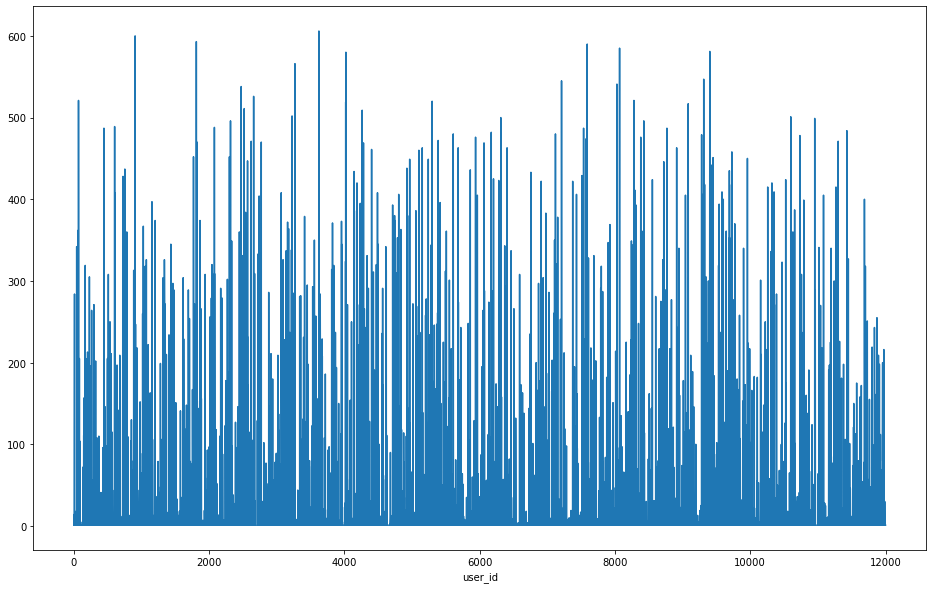

In [33]:
TotalVisits_each_user.plot(kind='line', figsize=(16,10))

There is a lot of data in our plot. So we cannot infer the trend effectively. 

In [59]:
#AvgWeeklySales_perStore.rename('AvgWeeklySalesperStore', inplace=True)
TotalVisits_each_user.rename('TotalVisits_byUser',inplace= True)

user_id
1         1
2        14
3         1
4         1
5         1
         ..
11996     1
11997     1
11998     1
11999     1
12000     1
Name: TotalVisits_byUser, Length: 8823, dtype: int64

In [60]:
users_logins= users_logins.merge(TotalVisits_each_user, how='left', left_on='user_id',right_index=True)

In [61]:
users_logins

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,TotalVisits_byUser
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1,14
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1,14
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1,14
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013-09-06 06:14:15,1,1
207913,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,2013-01-15 18:28:37,1,1
207914,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014-04-27 12:45:16,1,1
207915,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,2012-06-02 11:55:59,1,1


<AxesSubplot:>

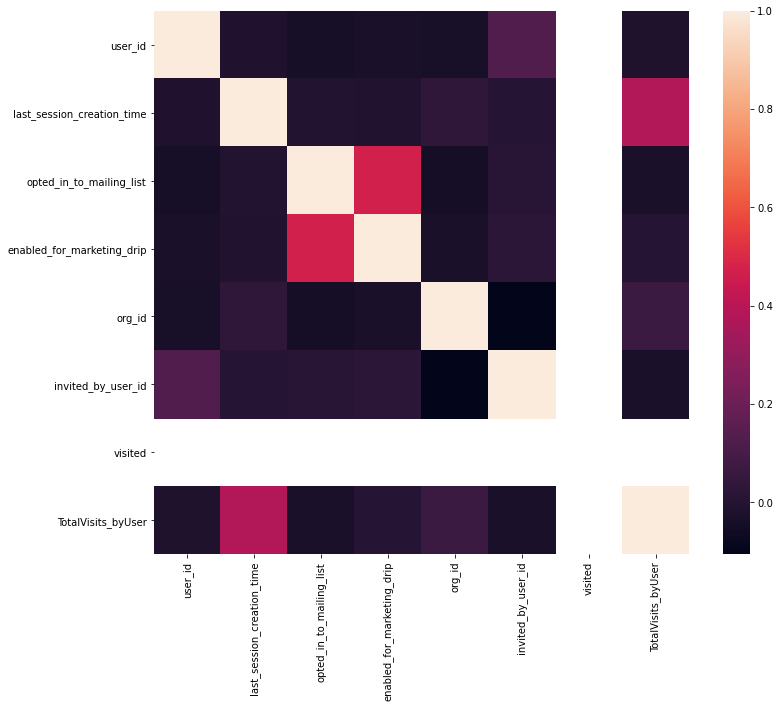

In [62]:
plt.subplots(figsize=(12,10))
sns.heatmap(users_logins.corr())

##### Findings and Conclusion

I imported takehome_users_.csv and takehome_user_engagement.csv. Users's data for almost 2 years were provided. In this span of time, some users have visted the product website more than 500 times, with 606 being the highest no of visited times.But we have also note that 50% - 75% of the users have logged into the prouct only once in the span of 2 years. We can also see that only 7.5% of the users have used the product more than 100 times in 2 years. However it can be seen that those people who have used the product 3 or more than three times in a week have continued to use the product and mostly these are the users who have used the product more than 100 times in a year. 

I joined the users_data and user_engagement data dataframe and used a correlation map to see if there is any correlation between the independent varibales. 'Last_session_creation_time' is the only variable that has a correlation(around 0.5) with the TotalVisits_by user variable. So I guess we can conclude that a person who has visited the product most recently will probably continue to use the product in the future and may probably become an 'adopted user'. 